## Fourier Series Composition / Decomposition

One of the most important principles of signal analysis is the notion that all signal patterns can be decomposed into a combination of sine and cosine components (where sometimes an infinite number of these are required for accurate representation).  Linear combinations of these sine and cosine components will then reproduce the original signal:

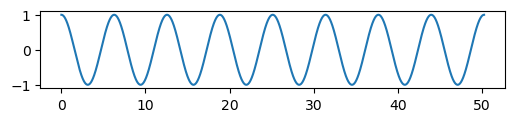

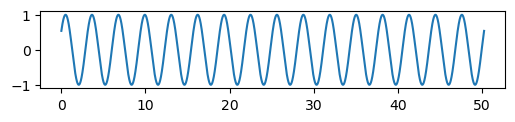

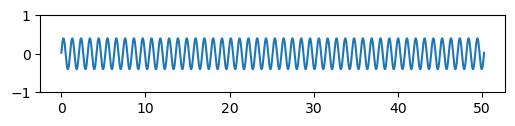

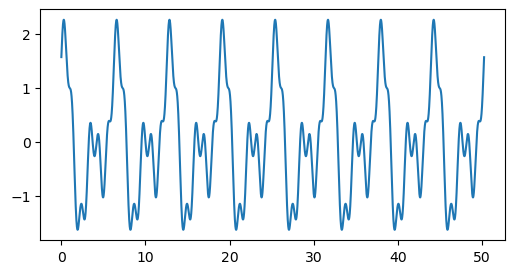

In [1]:
import numpy as np
%matplotlib inline
import pylab as plt

x = np.arange(0,8*2*np.pi,0.001)
plt.figure(figsize=(6,1))
y1 = np.cos(x)
plt.plot(x, y1)
plt.figure(figsize=(6,1))
y2 = np.cos(2*x-1)
plt.plot(x, y2)
plt.figure(figsize=(6,1))
y3 = 0.4*np.cos(6*x-1.5)
plt.ylim(-1,1)
plt.plot(x, y3)
plt.figure(figsize=(6,3))
plt.plot(x, y1+y2+y3)

With a Fourier Transform, the final plot above can be reversed to obtain the sinusoidal components used to create it.  With enough sinusoidal components, all signals can be analyzed in this way, even if they are non-repeating.  However, for signals which change their patterns substantially with time, we are often interested in examining the sinusoidal components characteristic of a restricted portions of the signal.  For this we will use a technique called wavelet analysis.

## Frequency Analysis

Here we will visually examine the mathematical foundations of Fourier and Wavelet analyses of power and phase at various frequencies.  We will do this by examining the cosine and sine terms (or "real" and "imaginary" terms) in the complex plane, where the cosine/real term is one axis, and the sine/imaginary term is another axis.  This is justified by the Euler relation described in Chapter 4 of the EHM text.
\begin{equation}
e^{i\phi} = \cos(\phi) + i\sin(\phi)
\end{equation}

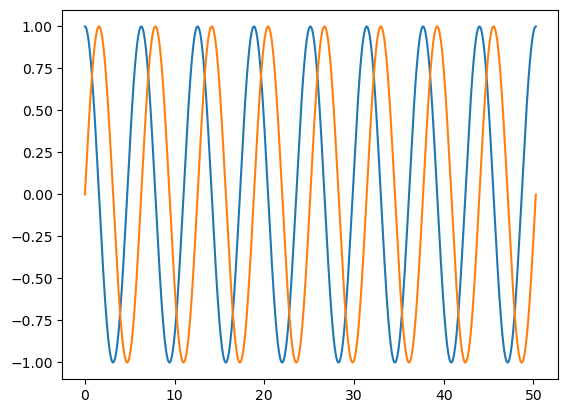

In [2]:
import numpy as np
%matplotlib inline
import pylab as plt

x = np.arange(0,8*2*np.pi,0.001)
plt.plot(x, np.cos(x))
plt.plot(x, np.sin(x))

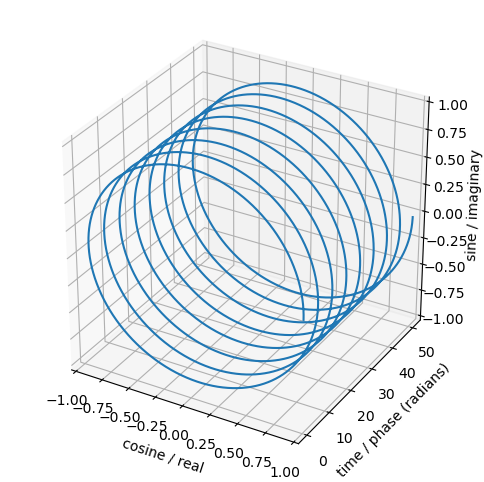

In [3]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1,1)
ax.set_xlabel('cosine / real')
ax.set_zlim(-1,1)
ax.set_zlabel('sine / imaginary')
ax.set_ylabel('time / phase (radians)')
ax.plot(np.cos(x), x, np.sin(x))

a = 0.4619445214722019
b = 0.19133974381900626
M = 0.5000036384696661
phi (set to  0.39269908169872414 ) = 0.392691797813932


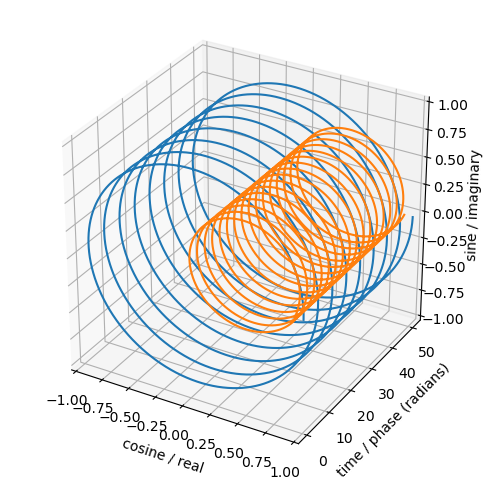

In [4]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1,1)
ax.set_xlabel('cosine / real')
ax.set_zlim(-1,1)
ax.set_zlabel('sine / imaginary')
ax.set_ylabel('time / phase (radians)')
ax.plot(np.cos(x), x, np.sin(x))
func = np.cos(x-np.pi/8)   # Function analyzed defined here  ***
ax.plot(func*np.cos(x), x, func*np.sin(x))
a = np.mean(func*np.cos(x))
b = np.mean(func*np.sin(x))
M = np.sqrt(a*a + b*b)
print('a =', a)
print('b =', b)
print('M =', M)
print('phi (set to ', np.pi/8, ') =', np.arctan2(b,a))

a = 5.148038077820446e-06
b = -1.2418546526398915e-09
M = 5.14803822760595e-06


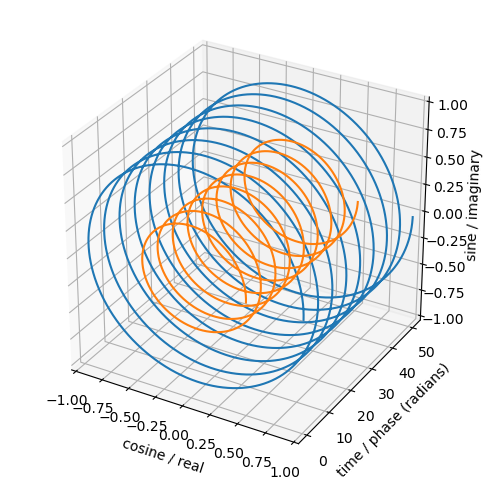

In [9]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1,1)
ax.set_xlabel('cosine / real')
ax.set_zlim(-1,1)
ax.set_zlabel('sine / imaginary')
ax.set_ylabel('time / phase (radians)')
ax.plot(np.cos(x), x, np.sin(x))
func = 0.5   # Function analyzed defined here, flat 0.5 for all phase values  ***
ax.plot(func*np.cos(x), x, func*np.sin(x))
a = np.mean(func*np.cos(x))
b = np.mean(func*np.sin(x))
M = np.sqrt(a*a + b*b)
print('a =', a)
print('b =', b)
print('M =', M)

a = -1.98941595587647e-05
b = 1.1790346458828112e-08
M = 1.989416305256038e-05
phi = 3.141


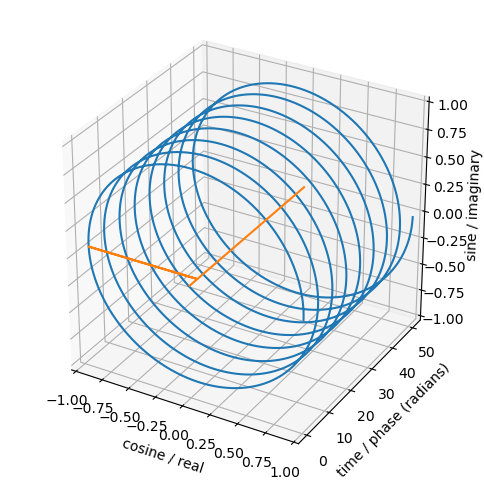

In [6]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1,1)
ax.set_xlabel('cosine / real')
ax.set_zlim(-1,1)
ax.set_zlabel('sine / imaginary')
ax.set_ylabel('time / phase (radians)')
ax.plot(np.cos(x), x, np.sin(x))

func = np.zeros(len(x))    # Function analyzed defined here, delta function  ***
func[int(1000*np.pi)] = 1  # at the first phase value of pi, with x step 0.001

ax.plot(func*np.cos(x), x, func*np.sin(x))
a = np.mean(func*np.cos(x))
b = np.mean(func*np.sin(x))
M = np.sqrt(a*a + b*b)
print('a =', a)
print('b =', b)
print('M =', M)
print('phi =', np.arctan2(b,a))

# Wavelets

As you can see in the last case above, the signal only existed for a brief moment, but the Fourier analysis for that frequency simply recorded the phase of that spike, but discarded the portion of time in which it happened.  While we could recover this information by examining the phase of enough frequencies, this is not as easy to think about as explicitly restricting our frequency analysis to a small portion of time.  For this we can use wavelets.  The simplest Morlet Wavelet applies a Gaussian envelope to the sine and cosine terms.  (Proper "Complete" Morlet Wavelets are similar, but with some additional lengthy terms to correcly preserve phase and power.)

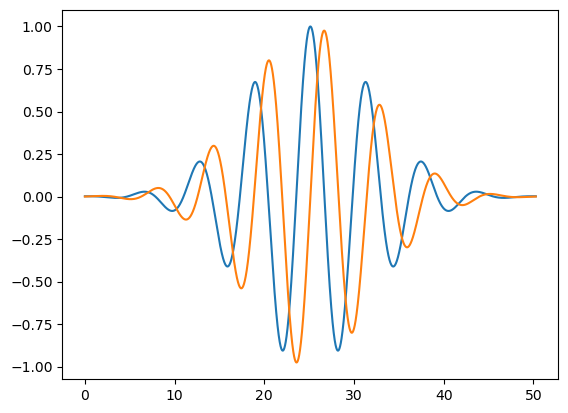

In [7]:
simple_morlet_cos = np.exp(-(1/2)*((x-x[int(len(x)/2)])/7)**2) * np.cos(x)
simple_morlet_sin = np.exp(-(1/2)*((x-x[int(len(x)/2)])/7)**2) * np.sin(x)

plt.plot(x, simple_morlet_cos)
plt.plot(x, simple_morlet_sin)

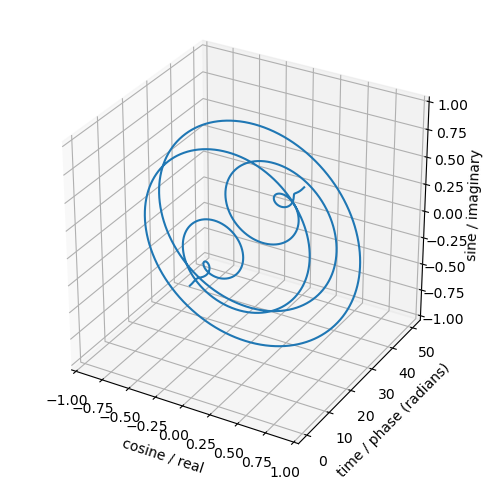

In [8]:
simple_morlet = np.exp(-(1/2)*((x-x[int(len(x)/2)])/7)**2) * (np.cos(x), np.sin(x))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1,1)
ax.set_xlabel('cosine / real')
ax.set_zlim(-1,1)
ax.set_zlabel('sine / imaginary')
ax.set_ylabel('time / phase (radians)')
ax.plot(simple_morlet[0], x, simple_morlet[1])

A signal multiplied by this Morlet Wavelet functions similarly to the Fourier case, except that only signal pieces in the Gaussian window are analyzed.  To examine another period of time, the wavelet is shifted and the next time period is analyzed.